# 库导入

In [26]:
import numpy as np
import pandas as pd


# 数据导入

In [27]:
sheet = pd.read_csv('data.csv')
data = sheet.iloc[:, :].values

sheet.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112,W,NCTL,0


In [28]:
print(data)

[['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'BC' 'NCTL'
  'ND']
 ['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'B' 'CTL'
  'ND']
 ['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'B' 'NCTL'
  'D']
 ...
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'C' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']]


In [29]:
final_match = []

for i in data:
    if i[0] == '2023-wimbledon-1701':
        final_match.append(i)

final_match = np.array(final_match)
print(final_match)

[['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'CTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']
 ...
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'C' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']]


In [30]:
# 打印出所有的列名
category = dict()
for i in range(len(sheet.columns)):
    category[sheet.columns[i]] = i
print(category)

{'match_id': 0, 'player1': 1, 'player2': 2, 'elapsed_time': 3, 'set_no': 4, 'game_no': 5, 'point_no': 6, 'p1_sets': 7, 'p2_sets': 8, 'p1_games': 9, 'p2_games': 10, 'p1_score': 11, 'p2_score': 12, 'server': 13, 'serve_no': 14, 'point_victor': 15, 'p1_points_won': 16, 'p2_points_won': 17, 'game_victor': 18, 'set_victor': 19, 'p1_ace': 20, 'p2_ace': 21, 'p1_winner': 22, 'p2_winner': 23, 'winner_shot_type': 24, 'p1_double_fault': 25, 'p2_double_fault': 26, 'p1_unf_err': 27, 'p2_unf_err': 28, 'p1_net_pt': 29, 'p2_net_pt': 30, 'p1_net_pt_won': 31, 'p2_net_pt_won': 32, 'p1_break_pt': 33, 'p2_break_pt': 34, 'p1_break_pt_won': 35, 'p2_break_pt_won': 36, 'p1_break_pt_missed': 37, 'p2_break_pt_missed': 38, 'p1_distance_run': 39, 'p2_distance_run': 40, 'rally_count': 41, 'speed_mph': 42, 'serve_width': 43, 'serve_depth': 44, 'return_depth': 45}


## 双误失分
double_fault_1 : { n : m }     代表 Carlos Alcaraz 截止第n个point，双误失分m次

double_fault_2 : { n : m }     代表 Novak Djokovic 截止第n个point，双误失分m次

In [31]:
print(len(final_match))
double_fault_1, double_fault_2 = dict(), dict()
unf_err_1,unf_err_2 = dict(),dict()
get_ace_1,get_ace_2 = dict(),dict()
return_duce_1,return_duce_2 = dict(),dict()
get_ad_1,get_ad_2 = dict(),dict()
run_distance_1,run_distance_2 = dict(),dict()
hit_num_1,hit_num_2 = dict(),dict()
on_net_1,on_net_2 = dict(),dict()
on_net_success_1,on_net_success_2 = dict(),dict()
game_score_1,game_score_2 = dict(),dict()
set_score_1,set_score_2 = dict(),dict()

334


In [32]:
for i in range(len(final_match)):
    if i==0:
        double_fault_1[i+1] = 0
        double_fault_2[i+1] = 0
    else:
        double_fault_1[i+1] = double_fault_1[i] + final_match[i][category['p1_double_fault']]
        double_fault_2[i+1] = double_fault_2[i] + final_match[i][category['p2_double_fault']]


print(double_fault_1)   
print(double_fault_2)
    

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 2, 132: 2, 133: 2, 134: 2, 135: 2, 136: 2, 137: 2, 138: 2, 139

## 受迫失误


In [33]:
for i in range(len(final_match)):
    if i==0:
        unf_err_1[i+1] = 0
        unf_err_2[i+1] = 0
    else:
        unf_err_1[i+1] = unf_err_1[i] + final_match[i][category['p1_unf_err']]
        unf_err_2[i+1] = unf_err_2[i] + final_match[i][category['p2_unf_err']]

print(unf_err_1)
print(unf_err_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 2, 12: 2, 13: 3, 14: 3, 15: 3, 16: 3, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 6, 33: 6, 34: 7, 35: 7, 36: 7, 37: 7, 38: 8, 39: 9, 40: 9, 41: 9, 42: 9, 43: 9, 44: 9, 45: 9, 46: 9, 47: 9, 48: 9, 49: 9, 50: 9, 51: 9, 52: 9, 53: 9, 54: 9, 55: 10, 56: 10, 57: 10, 58: 10, 59: 10, 60: 10, 61: 11, 62: 11, 63: 11, 64: 11, 65: 11, 66: 12, 67: 12, 68: 13, 69: 13, 70: 13, 71: 14, 72: 14, 73: 14, 74: 15, 75: 15, 76: 15, 77: 16, 78: 16, 79: 16, 80: 16, 81: 16, 82: 16, 83: 16, 84: 16, 85: 16, 86: 16, 87: 16, 88: 16, 89: 16, 90: 16, 91: 16, 92: 16, 93: 16, 94: 16, 95: 16, 96: 16, 97: 16, 98: 16, 99: 16, 100: 16, 101: 17, 102: 18, 103: 18, 104: 18, 105: 18, 106: 18, 107: 18, 108: 19, 109: 19, 110: 19, 111: 20, 112: 20, 113: 21, 114: 21, 115: 22, 116: 22, 117: 22, 118: 22, 119: 22, 120: 22, 121: 22, 122: 22, 123: 22, 124: 22, 125: 22, 126: 23, 127: 23, 128: 23, 129: 23, 

# ACE得分

In [34]:
for i in range(len(final_match)):
    if i==0:
        get_ace_1[i+1] = 0
        get_ace_2[i+1] = 0
    else:
        get_ace_1[i+1] = get_ace_1[i] + final_match[i][category['p1_ace']]
        get_ace_2[i+1] = get_ace_2[i] + final_match[i][category['p2_ace']]

print(get_ace_1)
print(get_ace_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 3, 131: 3, 132: 3, 133: 3, 134: 3, 135: 3, 136: 3, 137: 3, 138: 3, 139

## 回到deuce


In [35]:
for i in range(len(final_match)):
    if i==0:
        return_duce_1[i+1] = 0
        return_duce_2[i+1] = 0
    else:
        if final_match[i][category['p1_score']] < final_match[i][category['p2_score']] or final_match[i][category['p2_score']]=='AD' and final_match[i+1][category['p1_score']] == final_match[i][category['p2_score']]:
            duce1 = 0
        else:
            duce1 = 1
        

        if final_match[i][category['p2_score']] < final_match[i][category['p1_score']] or final_match[i][category['p1_score']]=='AD' and final_match[i+1][category['p2_score']] == final_match[i][category['p1_score']]:
            duce2 = 0
        else:   
            duce2 = 1
        return_duce_1[i+1] = return_duce_1[i] + duce1
        return_duce_2[i+1] = return_duce_2[i] + duce2



print(return_duce_1)
print(return_duce_2)

{1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 5, 9: 6, 10: 6, 11: 7, 12: 7, 13: 7, 14: 7, 15: 7, 16: 7, 17: 8, 18: 8, 19: 9, 20: 10, 21: 11, 22: 11, 23: 12, 24: 12, 25: 13, 26: 13, 27: 13, 28: 13, 29: 14, 30: 14, 31: 15, 32: 15, 33: 15, 34: 15, 35: 15, 36: 16, 37: 17, 38: 18, 39: 19, 40: 20, 41: 21, 42: 22, 43: 22, 44: 22, 45: 22, 46: 23, 47: 24, 48: 25, 49: 26, 50: 27, 51: 28, 52: 29, 53: 30, 54: 31, 55: 32, 56: 32, 57: 33, 58: 34, 59: 35, 60: 36, 61: 37, 62: 37, 63: 38, 64: 39, 65: 40, 66: 41, 67: 42, 68: 42, 69: 43, 70: 44, 71: 45, 72: 46, 73: 47, 74: 48, 75: 49, 76: 49, 77: 50, 78: 50, 79: 51, 80: 52, 81: 53, 82: 54, 83: 55, 84: 56, 85: 57, 86: 58, 87: 59, 88: 60, 89: 61, 90: 62, 91: 63, 92: 63, 93: 64, 94: 65, 95: 66, 96: 67, 97: 68, 98: 68, 99: 69, 100: 69, 101: 69, 102: 70, 103: 70, 104: 71, 105: 72, 106: 73, 107: 74, 108: 75, 109: 76, 110: 76, 111: 77, 112: 77, 113: 78, 114: 78, 115: 79, 116: 79, 117: 80, 118: 81, 119: 82, 120: 83, 121: 83, 122: 84, 123: 84, 124: 85, 125: 85, 1

## 获得AD

In [36]:
for i in range(len(final_match)):
    if i==0:
        get_ad_1[i+1] = 0
        get_ad_2[i+1] = 0
    else:
        if final_match[i][category['p1_score']] == 'AD' and final_match[i+1][category['p1_score']] != 'AD':
            ad1 = 1
        else:
            ad1 = 0
        if final_match[i][category['p2_score']] == 'AD' and final_match[i+1][category['p2_score']] != 'AD':
            ad2 = 1
        else:
            ad2 = 0
        get_ad_1[i+1] = get_ad_1[i] + ad1
        get_ad_2[i+1] = get_ad_2[i] + ad2
print(get_ad_1)
print(get_ad_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 1, 59: 1, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 3, 85: 3, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 4, 109: 4, 110: 4, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 4, 117: 4, 118: 4, 119: 4, 120: 4, 121: 4, 122: 4, 123: 4, 124: 4, 125: 4, 126: 4, 127: 4, 128: 4, 129: 4, 130: 4, 131: 4, 132: 4, 133: 4, 134: 4, 135: 4, 136: 4, 137: 4, 138: 4, 139

## 体能消耗

In [37]:
for i in range(len(final_match)):
    if i==0:
        run_distance_1[i+1] = 0
        run_distance_2[i+1] = 0
    else:
        run_distance_1[i+1] = run_distance_1[i] + final_match[i][category['p1_distance_run']]
        run_distance_2[i+1] = run_distance_2[i] + final_match[i][category['p2_distance_run']]
print(run_distance_1)
print(run_distance_2)

{1: 0, 2: 18.502, 3: 23.287999999999997, 4: 28.194999999999997, 5: 41.07599999999999, 6: 48.36899999999999, 7: 71.65199999999999, 8: 94.83099999999999, 9: 123.94599999999998, 10: 132.88699999999997, 11: 138.42699999999996, 12: 155.24599999999995, 13: 176.72799999999995, 14: 186.60399999999996, 15: 194.24199999999996, 16: 216.12199999999996, 17: 236.19999999999996, 18: 266.00499999999994, 19: 297.98599999999993, 20: 391.3499999999999, 21: 439.5909999999999, 22: 440.2599999999999, 23: 452.5379999999999, 24: 455.3209999999999, 25: 486.1859999999999, 26: 513.93, 27: 526.2969999999999, 28: 531.9799999999999, 29: 567.4359999999999, 30: 578.5029999999999, 31: 584.376, 32: 597.405, 33: 611.3009999999999, 34: 637.867, 35: 652.164, 36: 661.3199999999999, 37: 670.7729999999999, 38: 677.5799999999999, 39: 678.656, 40: 712.1479999999999, 41: 728.3409999999999, 42: 760.2979999999999, 43: 768.7889999999999, 44: 773.1929999999999, 45: 786.6909999999999, 46: 811.6419999999999, 47: 846.5649999999999, 48

## 击球次数

In [38]:
for i in range(len(final_match)):
    if i==0:
        hit_num_1[i+1] = 0
        hit_num_2[i+1] = 0
    else:
        hit_num_1[i+1] = hit_num_1[i] + final_match[i][category['rally_count']]
        hit_num_2[i+1] = hit_num_2[i] + final_match[i][category['rally_count']]

## 上网次数

In [39]:
for i in range(len(final_match)):
    if i==0:
        on_net_1[i+1] = 0
        on_net_2[i+1] = 0
    else:
        on_net_1[i+1] = on_net_1[i] + final_match[i][category['p1_net_pt']]
        on_net_2[i+1] = on_net_2[i] + final_match[i][category['p2_net_pt']]

## 上网成功次数

In [40]:
for i in range(len(final_match)):
    if i==0:
        on_net_success_1[i+1] = 0
        on_net_success_2[i+1] = 0
    else:
        on_net_success_1[i+1] = on_net_success_1[i] + final_match[i][category['p1_net_pt_won']]
        on_net_success_2[i+1] = on_net_success_2[i] + final_match[i][category['p2_net_pt_won']]
print(on_net_success_1)


{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 1, 37: 1, 38: 1, 39: 1, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 4, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 6, 63: 6, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 6, 73: 6, 74: 6, 75: 6, 76: 6, 77: 6, 78: 6, 79: 6, 80: 7, 81: 7, 82: 7, 83: 8, 84: 8, 85: 8, 86: 8, 87: 8, 88: 8, 89: 8, 90: 8, 91: 8, 92: 8, 93: 9, 94: 9, 95: 9, 96: 9, 97: 9, 98: 9, 99: 9, 100: 9, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 9, 107: 9, 108: 9, 109: 9, 110: 9, 111: 9, 112: 9, 113: 9, 114: 9, 115: 9, 116: 9, 117: 9, 118: 9, 119: 9, 120: 9, 121: 9, 122: 9, 123: 9, 124: 9, 125: 9, 126: 9, 127: 9, 128: 9, 129: 9, 130: 9, 131: 9, 132: 9, 133: 9, 134: 9, 135: 9, 136: 9, 137: 9, 138: 9, 139

# FZJ

In [41]:
one_serve_win_1,         one_serve_win_2       = dict(), dict()
one_serve_back_1,        one_serve_back_2      = dict(), dict()
one_serve_success_1,     one_serve_success_2   = dict(), dict()
two_serve_win_1,         two_serve_win_2       = dict(), dict()
two_serve_back_1,        two_serve_back_2      = dict(), dict()
break_pt_1,              break_pt_2            = dict(), dict()
break_pt_won_1,          break_pt_won_2        = dict(), dict()
continuous_win_1,        continuous_win_2      = dict(), dict()
avg_mph_1,               avg_mph_2             = dict(), dict()
max_mph_1,               max_mph_2             = dict(), dict()

In [42]:
last_won = 0
total_mph_1 = 0
total_mph_2 = 0
serve_times_1 = 0
serve_times_2 = 0


for i in range(len(final_match)):
    total_mph_1 += (final_match[i][category['speed_mph']] if final_match[i][category['server']] == 1 else 0)
    total_mph_2 += (final_match[i][category['speed_mph']] if final_match[i][category['server']] == 2 else 0)
    serve_times_1 += (final_match[i][category['server']] == 1)
    serve_times_2 += (final_match[i][category['server']] == 2)
    
    one_serve_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 1)
    one_serve_back_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_back_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 1)
    one_serve_success_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_success_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1)
    two_serve_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 1)
    two_serve_back_1[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_back_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 1 and final_match[i][category['p2_double_fault']] == 0)
    break_pt_1[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p1_break_pt']] == 1)
    break_pt_won_1[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_won_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p1_break_pt_won']] == 1)
    continuous_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else continuous_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['point_victor']] == 1 and last_won == 1)
    
    avg_mph_1[final_match[i][category['point_no']]] = (0 if serve_times_1 == 0 else total_mph_1 / serve_times_1)
    max_mph_1[final_match[i][category['point_no']]] = (0 if i == 0 else max_mph_1[final_match[i - 1][category['point_no']]])
    max_mph_1[final_match[i][category['point_no']]] = (max(max_mph_1[final_match[i][category['point_no']]], final_match[i][category['speed_mph']]) if final_match[i][category['server']] == 1 else max_mph_1[final_match[i][category['point_no']]])
    
    one_serve_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 2)
    one_serve_back_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_back_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 2)
    one_serve_success_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_success_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2)
    two_serve_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 2)
    two_serve_back_2[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_back_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 2 and final_match[i][category['p1_double_fault']] == 0)
    break_pt_2[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p2_break_pt']] == 1)
    break_pt_won_2[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_won_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p2_break_pt_won']] == 1)
    continuous_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else continuous_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['point_victor']] == 2 and last_won == 2)
    
    avg_mph_2[final_match[i][category['point_no']]] = (0 if serve_times_2 == 0 else total_mph_2 / serve_times_2)
    max_mph_2[final_match[i][category['point_no']]] = (0 if i == 0 else max_mph_2[final_match[i - 1][category['point_no']]])
    max_mph_2[final_match[i][category['point_no']]] = (max(max_mph_2[final_match[i][category['point_no']]], final_match[i][category['speed_mph']]) if final_match[i][category['server']] == 2 else max_mph_2[final_match[i][category['point_no']]])
    
    last_won = final_match[i][category['point_victor']]
    

# 合并数据，用于训练

In [43]:

one_serve_win_1 = np.array(list(one_serve_win_1.values()))
one_serve_win_2 = np.array(list(one_serve_win_2.values()))
one_serve_back_1 = np.array(list(one_serve_back_1.values()))
one_serve_back_2 = np.array(list(one_serve_back_2.values()))
one_serve_success_1 = np.array(list(one_serve_success_1.values()))
one_serve_success_2 = np.array(list(one_serve_success_2.values()))
two_serve_win_1 = np.array(list(two_serve_win_1.values()))
two_serve_win_2 = np.array(list(two_serve_win_2.values()))
two_serve_back_1 = np.array(list(two_serve_back_1.values()))
two_serve_back_2 = np.array(list(two_serve_back_2.values()))
break_pt_1 = np.array(list(break_pt_1.values()))
break_pt_2 = np.array(list(break_pt_2.values()))
break_pt_won_1 = np.array(list(break_pt_won_1.values()))
break_pt_won_2 = np.array(list(break_pt_won_2.values()))
continuous_win_1 = np.array(list(continuous_win_1.values()))
continuous_win_2 = np.array(list(continuous_win_2.values()))
avg_mph_1 = np.array(list(avg_mph_1.values()))
avg_mph_2 = np.array(list(avg_mph_2.values()))
max_mph_1 = np.array(list(max_mph_1.values()))
max_mph_2 = np.array(list(max_mph_2.values()))

double_fault_1 = np.array(list(double_fault_1.values()))
double_fault_2 = np.array(list(double_fault_2.values()))
unf_err_1 = np.array(list(unf_err_1.values()))
unf_err_2 = np.array(list(unf_err_2.values()))
get_ace_1 = np.array(list(get_ace_1.values()))
get_ace_2 = np.array(list(get_ace_2.values()))
return_duce_1 = np.array(list(return_duce_1.values()))
return_duce_2 = np.array(list(return_duce_2.values()))
get_ad_1 = np.array(list(get_ad_1.values()))
get_ad_2 = np.array(list(get_ad_2.values()))
run_distance_1 = np.array(list(run_distance_1.values()))
run_distance_2 = np.array(list(run_distance_2.values()))
hit_num_1 = np.array(list(hit_num_1.values()))
hit_num_2 = np.array(list(hit_num_2.values()))
on_net_1 = np.array(list(on_net_1.values()))
on_net_2 = np.array(list(on_net_2.values()))
on_net_success_1 = np.array(list(on_net_success_1.values()))
on_net_success_2 = np.array(list(on_net_success_2.values()))

print(len(one_serve_win_1))
print(len(double_fault_1))

334
334


In [44]:
# 打印出上面数组所有的长度
print('on_serve_1',len(one_serve_win_1))
print('on_serve_2',len(one_serve_win_2))
print('one_serve_back_1',len(one_serve_back_1))
print('one_serve_back_2',len(one_serve_back_2))
print('one_serve_success_1',len(one_serve_success_1))
print('one_serve_success_2',len(one_serve_success_2))
print('two_serve_win_1',len(two_serve_win_1))
print('two_serve_win_2',len(two_serve_win_2))
print('two_serve_back_1',len(two_serve_back_1))
print('two_serve_back_2',len(two_serve_back_2))
print('break_pt_1',len(break_pt_1))
print('break_pt_2',len(break_pt_2))
print('break_pt_won_1',len(break_pt_won_1))
print('break_pt_won_2',len(break_pt_won_2))
print('continuous_win_1',len(continuous_win_1))
print('continuous_win_2',len(continuous_win_2))
print('avg_mph_1',len(avg_mph_1))
print('avg_mph_2',len(avg_mph_2))
print('max_mph_1',len(max_mph_1))
print('max_mph_2',len(max_mph_2))

print('double_fault_1',len(double_fault_1))
print('double_fault_2',len(double_fault_2))
print('unf_err_1',len(unf_err_1))
print('unf_err_2',len(unf_err_2))
print('get_ace_1',len(get_ace_1))
print('get_ace_2',len(get_ace_2))
print('return_duce_1',len(return_duce_1))
print('return_duce_2',len(return_duce_2))
print('get_ad_1',len(get_ad_1))
print('get_ad_2',len(get_ad_2))
print('run_distance_1',len(run_distance_1))
print('run_distance_2',len(run_distance_2))
print('hit_num_1',len(hit_num_1))
print('hit_num_2',len(hit_num_2))
print('on_net_1',len(on_net_1))
print('on_net_2',len(on_net_2))
print('on_net_success_1',len(on_net_success_1))
print('on_net_success_2',len(on_net_success_2))




on_serve_1 334
on_serve_2 334
one_serve_back_1 334
one_serve_back_2 334
one_serve_success_1 334
one_serve_success_2 334
two_serve_win_1 334
two_serve_win_2 334
two_serve_back_1 334
two_serve_back_2 334
break_pt_1 334
break_pt_2 334
break_pt_won_1 334
break_pt_won_2 334
continuous_win_1 334
continuous_win_2 334
avg_mph_1 334
avg_mph_2 334
max_mph_1 334
max_mph_2 334
double_fault_1 334
double_fault_2 334
unf_err_1 334
unf_err_2 334
get_ace_1 334
get_ace_2 334
return_duce_1 334
return_duce_2 334
get_ad_1 334
get_ad_2 334
run_distance_1 334
run_distance_2 334
hit_num_1 334
hit_num_2 334
on_net_1 334
on_net_2 334
on_net_success_1 334
on_net_success_2 334


In [45]:
# 将上面的数组合并成一个大的矩阵，用于训练
train_data = np.array([one_serve_win_1, one_serve_win_2, one_serve_back_1, one_serve_back_2, one_serve_success_1, one_serve_success_2, two_serve_win_1, two_serve_win_2, two_serve_back_1, two_serve_back_2, break_pt_1, break_pt_2, break_pt_won_1, break_pt_won_2, continuous_win_1, continuous_win_2, avg_mph_1, avg_mph_2, max_mph_1, max_mph_2, double_fault_1, double_fault_2, unf_err_1, unf_err_2, get_ace_1, get_ace_2, return_duce_1, return_duce_2, get_ad_1, get_ad_2, run_distance_1, run_distance_2, hit_num_1, hit_num_2, on_net_1, on_net_2, on_net_success_1, on_net_success_2]).T
print(train_data.shape)

(334, 38)


In [46]:
train_label = final_match[:, category['point_victor']]
print(train_label.shape)
print(train_label)

(334,)
[2 1 1 2 1 2 2 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 2 1 1 2 2 2 2 1 2 2 1 1
 2 2 1 1 2 2 2 2 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 2 1 2 2 2 1 1 2 2 1 2
 2 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2
 1 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2
 1 1 1 2 1 2 1 1 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 1 1 2 1 2 1 1 2 2 1 1 2 2 1
 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2
 2 1 2 1 1 2 2 1 2 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 2 2 1 2
 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 1 2 1 2 1
 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 1 2 1 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1
 1]


In [47]:
# 将train_data PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_data_2 = pca.fit_transform(train_data)
print(train_data_2.shape)


(334, 2)


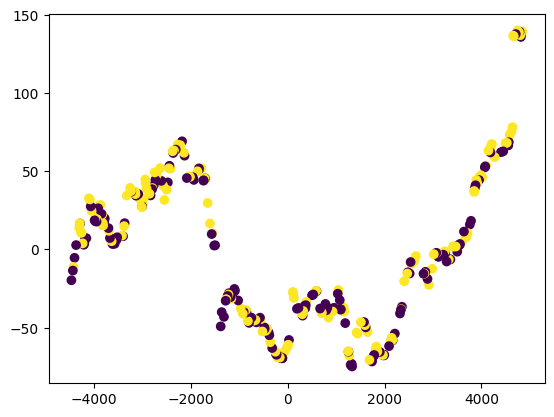

In [48]:
# 评价一下降维的效果
import matplotlib.pyplot as plt
plt.scatter(train_data_2[:, 0], train_data_2[:, 1], c=train_label)
plt.show()

In [49]:
# 降维成3维
pca = PCA(n_components=3)
train_data_3 = pca.fit_transform(train_data)
print(train_data_3.shape)


(334, 3)


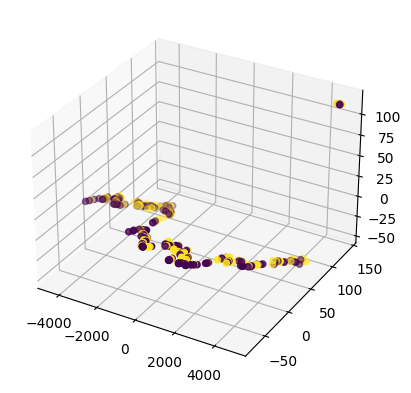

In [50]:
# 评价一下降维的效果
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_3[:, 0], train_data_3[:, 1], train_data_3[:, 2], c=train_label)
plt.show()

In [51]:
# 用TSHNE降维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
train_data_3 = tsne.fit_transform(train_data)
print(train_data_3.shape)

(334, 3)


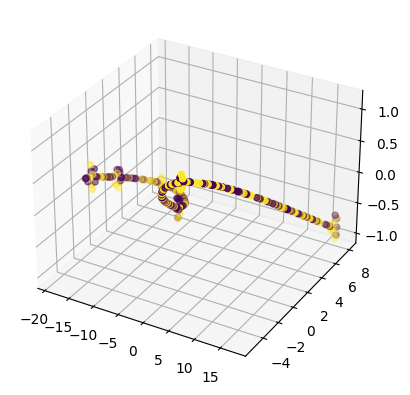

In [52]:
# 评价一下降维的效果
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_3[:, 0], train_data_3[:, 1], train_data_3[:, 2], c=train_label)
plt.show()
